## Import Libraries

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings #Ignore all warnings
warnings.filterwarnings("ignore")

import itertools

from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler, OneHotEncoder, PolynomialFeatures 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.linear_model import LinearRegression, LassoCV, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_regression, mutual_info_regression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In /Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases lat

## Import & Join Datasets

In [2]:
clinical_data = pd.read_csv('Coding_Assignment_Files/clinical_data.csv')
demo_data = pd.read_csv('Coding_Assignment_Files/demographics.csv')
billid_data = pd.read_csv('Coding_Assignment_Files/bill_id.csv')
billamt_data = pd.read_csv('Coding_Assignment_Files/bill_amount.csv')

In [3]:
# Check Shape
print(clinical_data.shape)
print(demo_data.shape)
print(billid_data.shape)
print(billamt_data.shape)

(3400, 26)
(3000, 5)
(13600, 3)
(13600, 2)


In [4]:
# Join bill_id to bill amount by bill_id - new table name 'Bills'
# Join Bills to clinical_data by id/patient_id- new table name 'Patient Bills'
# Join Patient Bills to demographic by patient_id - new table name 'treatment_df'


In [5]:
bills_df = billid_data.merge(billamt_data, on='bill_id', how='left')
bills_df.head()

bill_id                        patient_id date_of_admission  \
0  7968360812  1d21f2be18683991eb93d182d6b2d220        2011-01-01   
1  6180579974  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01   
2  7512568183  1d21f2be18683991eb93d182d6b2d220        2011-01-01   
3  3762633379  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01   
4  7654730355  1d21f2be18683991eb93d182d6b2d220        2011-01-01   

         amount  
0    951.214467  
1  19900.297086  
2  12338.269972  
3   1145.372193  
4   1133.601902

In [6]:
# Change 'id' to 'patient_id'
clinical_data = clinical_data.rename(columns = {"id":'patient_id'})
clinical_data.head()

patient_id date_of_admission date_of_discharge  \
0  1d21f2be18683991eb93d182d6b2d220        2011-01-01        2011-01-11   
1  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01        2011-01-11   
2  c85cf97bc6307ded0dd4fef8bad2fa09        2011-01-02        2011-01-13   
3  e0397dd72caf4552c5babebd3d61736c        2011-01-02        2011-01-14   
4  94ade3cd5f66f4584902554dff170a29        2011-01-08        2011-01-16   

   medical_history_1  medical_history_2 medical_history_3  medical_history_4  \
0                  0                1.0                 0                  0   
1                  0                0.0                 0                  0   
2                  0                0.0                 0                  0   
3                  0                1.0                No                  0   
4                  0                0.0                No                  0   

   medical_history_5  medical_history_6  medical_history_7  ...  symptom_1  \
0                0.0                  0                  0  ...          0   
1                0.0                  0                  0  ...          0   
2                0.0                  0                  0  ...          1   
3                0.0                  1                  1  ...          1   
4                0.0                  1                  1  ...          0   

   symptom_2  symptom_3  symptom_4  symptom_5  lab_result_1  lab_result_2  \
0          0          0          1          1          13.2          30.9   
1          0          1          1          1          13.8          22.6   
2          1          1          1          0          11.2          26.2   
3          1          1          1          1          13.3          28.4   
4          1          0          1          0          12.0          27.8   

   lab_result_3  weight  height  
0         123.0    71.3   161.0  
1          89.0    78.4   160.0  
2         100.0    72.0   151.0  
3          76.0    64.4   152.0  
4          87.0    55.6   160.0  

[5 rows x 26 columns]

In [7]:
patients_df = demo_data.merge(clinical_data, on='patient_id', how='left')
patients_df.head()

patient_id  gender     race    resident_status  \
0  fa2d818b2261e44e30628ad1ac9cc72c  Female   Indian        Singaporean   
1  5b6477c5de78d0b138e3b0c18e21d0ae       f  Chinese  Singapore citizen   
2  320aa16c61937447fd6631bf635e7fde    Male  Chinese  Singapore citizen   
3  320aa16c61937447fd6631bf635e7fde    Male  Chinese  Singapore citizen   
4  c7f3881684045e6c49020481020fae36    Male    Malay  Singapore citizen   

  date_of_birth date_of_admission date_of_discharge  medical_history_1  \
0    1971-05-14        2014-09-20        2014-10-04                  0   
1    1976-02-18        2014-08-08        2014-08-18                  0   
2    1982-07-03        2011-03-10        2011-03-20                  0   
3    1982-07-03        2013-07-02        2013-07-14                  0   
4    1947-06-15        2015-10-28        2015-11-10                  0   

   medical_history_2 medical_history_3  ...  symptom_1  symptom_2  symptom_3  \
0                0.0                 0  ...          1          1          0   
1                0.0                No  ...          1          1          1   
2                0.0                No  ...          0          0          1   
3                0.0                 0  ...          1          0          0   
4                1.0                 0  ...          1          1          1   

   symptom_4  symptom_5  lab_result_1  lab_result_2  lab_result_3  weight  \
0          0          1          14.2          27.0          81.0    68.1   
1          1          1          14.3          27.2          92.0    76.5   
2          1          1          14.4          26.6          92.0    69.7   
3          1          0          18.0          26.6          92.0    66.7   
4          1          1          14.9          26.7          97.0    96.9   

   height  
0   161.0  
1   151.0  
2   175.0  
3   175.0  
4   180.0  

[5 rows x 30 columns]

In [8]:
# Join on patient_id and date of admission
treatment_df = bills_df.merge(patients_df, on=['patient_id', 'date_of_admission',], how='left')
treatment_df.head()

bill_id                        patient_id date_of_admission  \
0  7968360812  1d21f2be18683991eb93d182d6b2d220        2011-01-01   
1  6180579974  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01   
2  7512568183  1d21f2be18683991eb93d182d6b2d220        2011-01-01   
3  3762633379  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01   
4  7654730355  1d21f2be18683991eb93d182d6b2d220        2011-01-01   

         amount  gender    race resident_status date_of_birth  \
0    951.214467    Male  Indian     Singaporean    1976-12-19   
1  19900.297086  Female   Malay     Singaporean    1978-07-20   
2  12338.269972    Male  Indian     Singaporean    1976-12-19   
3   1145.372193  Female   Malay     Singaporean    1978-07-20   
4   1133.601902    Male  Indian     Singaporean    1976-12-19   

  date_of_discharge  medical_history_1  ...  symptom_1 symptom_2  symptom_3  \
0        2011-01-11                  0  ...          0         0          0   
1        2011-01-11                  0  ...          0         0          1   
2        2011-01-11                  0  ...          0         0          0   
3        2011-01-11                  0  ...          0         0          1   
4        2011-01-11                  0  ...          0         0          0   

   symptom_4  symptom_5  lab_result_1  lab_result_2  lab_result_3  weight  \
0          1          1          13.2          30.9         123.0    71.3   
1          1          1          13.8          22.6          89.0    78.4   
2          1          1          13.2          30.9         123.0    71.3   
3          1          1          13.8          22.6          89.0    78.4   
4          1          1          13.2          30.9         123.0    71.3   

   height  
0   161.0  
1   160.0  
2   161.0  
3   160.0  
4   161.0  

[5 rows x 32 columns]

In [9]:
treatment_df = treatment_df.groupby(['bill_id', 'patient_id','amount'], as_index=False).apply(lambda x : x.sum())
treatment_df.head()

bill_id  \
bill_id patient_id                       amount                 
558412  54c00a685cd49f4ed59a389657af655b 6539.159300   558412   
1219378 a135b44a73f9e99424a91edc846185de 876.424366   1219378   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933   3568195   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493   3722123   
4477075 a54070aa18ab3579495a157364f70a39 397.293041   4477075   

                                                                            patient_id  \
bill_id patient_id                       amount                                          
558412  54c00a685cd49f4ed59a389657af655b 6539.159300  54c00a685cd49f4ed59a389657af655b   
1219378 a135b44a73f9e99424a91edc846185de 876.424366   a135b44a73f9e99424a91edc846185de   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933   4a8da205ade786dd74c316c39dcbe99f   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493   277ad90d43a1289b0bf22f9795c5c706   
4477075 a54070aa18ab3579495a157364f70a39 397.293041   a54070aa18ab3579495a157364f70a39   

                                                     date_of_admission  \
bill_id patient_id                       amount                          
558412  54c00a685cd49f4ed59a389657af655b 6539.159300        2013-02-23   
1219378 a135b44a73f9e99424a91edc846185de 876.424366         2013-11-28   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933         2014-12-12   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493         2012-02-16   
4477075 a54070aa18ab3579495a157364f70a39 397.293041         2012-12-03   

                                                           amount  gender  \
bill_id patient_id                       amount                             
558412  54c00a685cd49f4ed59a389657af655b 6539.159300  6539.159300  Female   
1219378 a135b44a73f9e99424a91edc846185de 876.424366    876.424366    Male   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933    956.968933    Male   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493    836.612493  Female   
4477075 a54070aa18ab3579495a157364f70a39 397.293041    397.293041    Male   

                                                         race  \
bill_id patient_id                       amount                 
558412  54c00a685cd49f4ed59a389657af655b 6539.159300  Chinese   
1219378 a135b44a73f9e99424a91edc846185de 876.424366   Chinese   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933   Chinese   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493   chinese   
4477075 a54070aa18ab3579495a157364f70a39 397.293041   Chinese   

                                                        resident_status  \
bill_id patient_id                       amount                           
558412  54c00a685cd49f4ed59a389657af655b 6539.159300        Singaporean   
1219378 a135b44a73f9e99424a91edc846185de 876.424366   Singapore citizen   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933         Singaporean   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493         Singaporean   
4477075 a54070aa18ab3579495a157364f70a39 397.293041         Singaporean   

                                                     date_of_birth  \
bill_id patient_id                       amount                      
558412  54c00a685cd49f4ed59a389657af655b 6539.159300    1974-05-09   
1219378 a135b44a73f9e99424a91edc846185de 876.424366     1946-02-09   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933     1969-11-13   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493     1973-04-21   
4477075 a54070aa18ab3579495a157364f70a39 397.293041     1968-09-05   

                                                     date_of_discharge  \
bill_id patient_id                       amount                          
558412  54c00a685cd49f4ed59a389657af655b 6539.159300        2013-03-04   
1219378 a135b44a73f9e99424a91edc846185de 876.424366         2013-12-11   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933         2014-12-25   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493         2012-

In [10]:
treatment_df = treatment_df.rename_axis(index={'bill_id':'a', 'patient_id':'b', 'amount':'c'})
treatment_df.head()

bill_id  \
a       b                                c                      
558412  54c00a685cd49f4ed59a389657af655b 6539.159300   558412   
1219378 a135b44a73f9e99424a91edc846185de 876.424366   1219378   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933   3568195   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493   3722123   
4477075 a54070aa18ab3579495a157364f70a39 397.293041   4477075   

                                                                            patient_id  \
a       b                                c                                               
558412  54c00a685cd49f4ed59a389657af655b 6539.159300  54c00a685cd49f4ed59a389657af655b   
1219378 a135b44a73f9e99424a91edc846185de 876.424366   a135b44a73f9e99424a91edc846185de   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933   4a8da205ade786dd74c316c39dcbe99f   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493   277ad90d43a1289b0bf22f9795c5c706   
4477075 a54070aa18ab3579495a157364f70a39 397.293041   a54070aa18ab3579495a157364f70a39   

                                                     date_of_admission  \
a       b                                c                               
558412  54c00a685cd49f4ed59a389657af655b 6539.159300        2013-02-23   
1219378 a135b44a73f9e99424a91edc846185de 876.424366         2013-11-28   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933         2014-12-12   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493         2012-02-16   
4477075 a54070aa18ab3579495a157364f70a39 397.293041         2012-12-03   

                                                           amount  gender  \
a       b                                c                                  
558412  54c00a685cd49f4ed59a389657af655b 6539.159300  6539.159300  Female   
1219378 a135b44a73f9e99424a91edc846185de 876.424366    876.424366    Male   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933    956.968933    Male   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493    836.612493  Female   
4477075 a54070aa18ab3579495a157364f70a39 397.293041    397.293041    Male   

                                                         race  \
a       b                                c                      
558412  54c00a685cd49f4ed59a389657af655b 6539.159300  Chinese   
1219378 a135b44a73f9e99424a91edc846185de 876.424366   Chinese   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933   Chinese   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493   chinese   
4477075 a54070aa18ab3579495a157364f70a39 397.293041   Chinese   

                                                        resident_status  \
a       b                                c                                
558412  54c00a685cd49f4ed59a389657af655b 6539.159300        Singaporean   
1219378 a135b44a73f9e99424a91edc846185de 876.424366   Singapore citizen   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933         Singaporean   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493         Singaporean   
4477075 a54070aa18ab3579495a157364f70a39 397.293041         Singaporean   

                                                     date_of_birth  \
a       b                                c                           
558412  54c00a685cd49f4ed59a389657af655b 6539.159300    1974-05-09   
1219378 a135b44a73f9e99424a91edc846185de 876.424366     1946-02-09   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933     1969-11-13   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493     1973-04-21   
4477075 a54070aa18ab3579495a157364f70a39 397.293041     1968-09-05   

                                                     date_of_discharge  \
a       b                                c                               
558412  54c00a685cd49f4ed59a389657af655b 6539.159300        2013-03-04   
1219378 a135b44a73f9e99424a91edc846185de 876.424366         2013-12-11   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933         2014-12-25   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493         2012-

In [11]:
treatment_df = treatment_df.droplevel([0,1]).reset_index()
treatment_df.head()

c  bill_id                        patient_id date_of_admission  \
0  6539.159300   558412  54c00a685cd49f4ed59a389657af655b        2013-02-23   
1   876.424366  1219378  a135b44a73f9e99424a91edc846185de        2013-11-28   
2   956.968933  3568195  4a8da205ade786dd74c316c39dcbe99f        2014-12-12   
3   836.612493  3722123  277ad90d43a1289b0bf22f9795c5c706        2012-02-16   
4   397.293041  4477075  a54070aa18ab3579495a157364f70a39        2012-12-03   

        amount  gender     race    resident_status date_of_birth  \
0  6539.159300  Female  Chinese        Singaporean    1974-05-09   
1   876.424366    Male  Chinese  Singapore citizen    1946-02-09   
2   956.968933    Male  Chinese        Singaporean    1969-11-13   
3   836.612493  Female  chinese        Singaporean    1973-04-21   
4   397.293041    Male  Chinese        Singaporean    1968-09-05   

  date_of_discharge  ...  symptom_1  symptom_2 symptom_3  symptom_4  \
0        2013-03-04  ...          0          1         0          1   
1        2013-12-11  ...          0          0         0          1   
2        2014-12-25  ...          0          1         1          1   
3        2012-02-27  ...          1          0         0          1   
4        2012-12-14  ...          1          1         1          1   

   symptom_5  lab_result_1  lab_result_2  lab_result_3  weight  height  
0          0          14.3          26.4         113.0    81.0   161.0  
1          1          16.0          25.9          91.0    89.9   163.0  
2          1          11.9          29.9          85.0    77.8   176.0  
3          1          11.2          27.6          77.0    80.2   151.0  
4          0          15.0          27.6         108.0    87.0   175.0  

[5 rows x 33 columns]

In [12]:
treatment_df = treatment_df.drop('c', axis=1)
treatment_df.head()

bill_id                        patient_id date_of_admission       amount  \
0   558412  54c00a685cd49f4ed59a389657af655b        2013-02-23  6539.159300   
1  1219378  a135b44a73f9e99424a91edc846185de        2013-11-28   876.424366   
2  3568195  4a8da205ade786dd74c316c39dcbe99f        2014-12-12   956.968933   
3  3722123  277ad90d43a1289b0bf22f9795c5c706        2012-02-16   836.612493   
4  4477075  a54070aa18ab3579495a157364f70a39        2012-12-03   397.293041   

   gender     race    resident_status date_of_birth date_of_discharge  \
0  Female  Chinese        Singaporean    1974-05-09        2013-03-04   
1    Male  Chinese  Singapore citizen    1946-02-09        2013-12-11   
2    Male  Chinese        Singaporean    1969-11-13        2014-12-25   
3  Female  chinese        Singaporean    1973-04-21        2012-02-27   
4    Male  Chinese        Singaporean    1968-09-05        2012-12-14   

   medical_history_1  ...  symptom_1 symptom_2  symptom_3  symptom_4  \
0                  0  ...          0         1          0          1   
1                  1  ...          0         0          0          1   
2                  0  ...          0         1          1          1   
3                  1  ...          1         0          0          1   
4                  1  ...          1         1          1          1   

   symptom_5  lab_result_1  lab_result_2  lab_result_3  weight  height  
0          0          14.3          26.4         113.0    81.0   161.0  
1          1          16.0          25.9          91.0    89.9   163.0  
2          1          11.9          29.9          85.0    77.8   176.0  
3          1          11.2          27.6          77.0    80.2   151.0  
4          0          15.0          27.6         108.0    87.0   175.0  

[5 rows x 32 columns]

In [13]:
profile = ProfileReport(treatment_df, title='Pandas Profile Report')
profile

In [14]:
treatment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bill_id             13600 non-null  int64  
 1   patient_id          13600 non-null  object 
 2   date_of_admission   13600 non-null  object 
 3   amount              13600 non-null  float64
 4   gender              13600 non-null  object 
 5   race                13600 non-null  object 
 6   resident_status     13600 non-null  object 
 7   date_of_birth       13600 non-null  object 
 8   date_of_discharge   13600 non-null  object 
 9   medical_history_1   13600 non-null  int64  
 10  medical_history_2   13600 non-null  float64
 11  medical_history_3   13600 non-null  object 
 12  medical_history_4   13600 non-null  int64  
 13  medical_history_5   13600 non-null  float64
 14  medical_history_6   13600 non-null  int64  
 15  medical_history_7   13600 non-null  int64  
 16  preo

In [15]:
data_copy = treatment_df.copy()

## Preprocessing: Data Cleaning

### Misc. Values

In [16]:
# Replace Miscellaneous Values
treatment_df['gender'] = treatment_df['gender'].replace('m', 'Male').replace('f','Female')

treatment_df['race'] = treatment_df['race'].replace('chinese', 'Chinese')
treatment_df['race'] = treatment_df['race'].replace('India', 'Indian')

treatment_df['resident_status'] = treatment_df['resident_status'].replace('Singapore citizen','Singaporean')

treatment_df['medical_history_3'] = treatment_df['medical_history_3'].replace('No','0').replace('Yes', '1')


In [17]:
# Check
for col in treatment_df.columns:
    print(col, '\n', treatment_df[col].value_counts().head(), '\n\n')

bill_id 
 714706942     1
9962935055    1
6330446603    1
6201565961    1
8853068550    1
Name: bill_id, dtype: int64 


patient_id 
 4e46fddfa404b306809c350aecbf0f6a    16
a0214fcb0b1e3cf8d667e77a27f9840c    12
cf835526e33d00afa016ac898582038c    12
d01386ff66ee5ecef47c5ef7980ff10a    12
64a531972193ccf232cc47597ddb85ed    12
Name: patient_id, dtype: int64 


date_of_admission 
 2014-05-24    36
2012-08-19    28
2012-10-22    28
2014-05-21    28
2013-04-25    28
Name: date_of_admission, dtype: int64 


amount 
 20213.306482    2
30839.804020    2
13948.627998    2
1012.028954     2
1787.576169     2
Name: amount, dtype: int64 


gender 
 Female    6808
Male      6792
Name: gender, dtype: int64 


race 
 Chinese    8664
Malay      2828
Indian     1376
Others      732
Name: race, dtype: int64 


resident_status 
 Singaporean    10896
PR              2060
Foreigner        644
Name: resident_status, dtype: int64 


date_of_birth 
 1975-08-20    20
1958-07-20    16
1941-04-22    16
1981-11

#### Convert Datatypes from Object to Datetime and Object to Int

In [18]:
# Convert dates from Objects to Datetime
treatment_df['date_of_admission'] = pd.to_datetime(treatment_df['date_of_admission']) 
treatment_df['date_of_birth'] = pd.to_datetime(treatment_df['date_of_birth']) 
treatment_df['date_of_discharge'] = pd.to_datetime(treatment_df['date_of_discharge']) 


In [19]:
# Convert bill_id to object
treatment_df['bill_id'] = treatment_df['bill_id'].astype('str')

# Convert medical_history_3
treatment_df['medical_history_3'] = treatment_df['medical_history_3'].astype('float')

In [20]:
# Check
treatment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bill_id             13600 non-null  object        
 1   patient_id          13600 non-null  object        
 2   date_of_admission   13600 non-null  datetime64[ns]
 3   amount              13600 non-null  float64       
 4   gender              13600 non-null  object        
 5   race                13600 non-null  object        
 6   resident_status     13600 non-null  object        
 7   date_of_birth       13600 non-null  datetime64[ns]
 8   date_of_discharge   13600 non-null  datetime64[ns]
 9   medical_history_1   13600 non-null  int64         
 10  medical_history_2   13600 non-null  float64       
 11  medical_history_3   13600 non-null  float64       
 12  medical_history_4   13600 non-null  int64         
 13  medical_history_5   13600 non-null  float64   

### Preprocessing: Feature Engineering for Anaylsis

In [21]:
# Extract Birth Year
treatment_df['year_of_birth'] = pd.DatetimeIndex(treatment_df['date_of_birth']).year

# Extract Month of Admission
treatment_df['month_of_admission'] = pd.DatetimeIndex(treatment_df['date_of_admission']).month

# Calculate Length of Hospital Stay
treatment_df['length_of_stay'] = (treatment_df['date_of_discharge'] - treatment_df['date_of_admission']).dt.days

In [22]:
treatment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bill_id             13600 non-null  object        
 1   patient_id          13600 non-null  object        
 2   date_of_admission   13600 non-null  datetime64[ns]
 3   amount              13600 non-null  float64       
 4   gender              13600 non-null  object        
 5   race                13600 non-null  object        
 6   resident_status     13600 non-null  object        
 7   date_of_birth       13600 non-null  datetime64[ns]
 8   date_of_discharge   13600 non-null  datetime64[ns]
 9   medical_history_1   13600 non-null  int64         
 10  medical_history_2   13600 non-null  float64       
 11  medical_history_3   13600 non-null  float64       
 12  medical_history_4   13600 non-null  int64         
 13  medical_history_5   13600 non-null  float64   

In [23]:
treatment_df.head()

bill_id                        patient_id date_of_admission       amount  \
0   558412  54c00a685cd49f4ed59a389657af655b        2013-02-23  6539.159300   
1  1219378  a135b44a73f9e99424a91edc846185de        2013-11-28   876.424366   
2  3568195  4a8da205ade786dd74c316c39dcbe99f        2014-12-12   956.968933   
3  3722123  277ad90d43a1289b0bf22f9795c5c706        2012-02-16   836.612493   
4  4477075  a54070aa18ab3579495a157364f70a39        2012-12-03   397.293041   

   gender     race resident_status date_of_birth date_of_discharge  \
0  Female  Chinese     Singaporean    1974-05-09        2013-03-04   
1    Male  Chinese     Singaporean    1946-02-09        2013-12-11   
2    Male  Chinese     Singaporean    1969-11-13        2014-12-25   
3  Female  Chinese     Singaporean    1973-04-21        2012-02-27   
4    Male  Chinese     Singaporean    1968-09-05        2012-12-14   

   medical_history_1  ...  symptom_4  symptom_5  lab_result_1  lab_result_2  \
0                  0  ...          1          0          14.3          26.4   
1                  1  ...          1          1          16.0          25.9   
2                  0  ...          1          1          11.9          29.9   
3                  1  ...          1          1          11.2          27.6   
4                  1  ...          1          0          15.0          27.6   

   lab_result_3  weight  height  year_of_birth  month_of_admission  \
0         113.0    81.0   161.0           1974                   2   
1          91.0    89.9   163.0           1946                  11   
2          85.0    77.8   176.0           1969                  12   
3          77.0    80.2   151.0           1973                   2   
4         108.0    87.0   175.0           1968                  12   

   length_of_stay  
0               9  
1              13  
2              13  
3              11  
4              11  

[5 rows x 35 columns]

### Treat Outliers

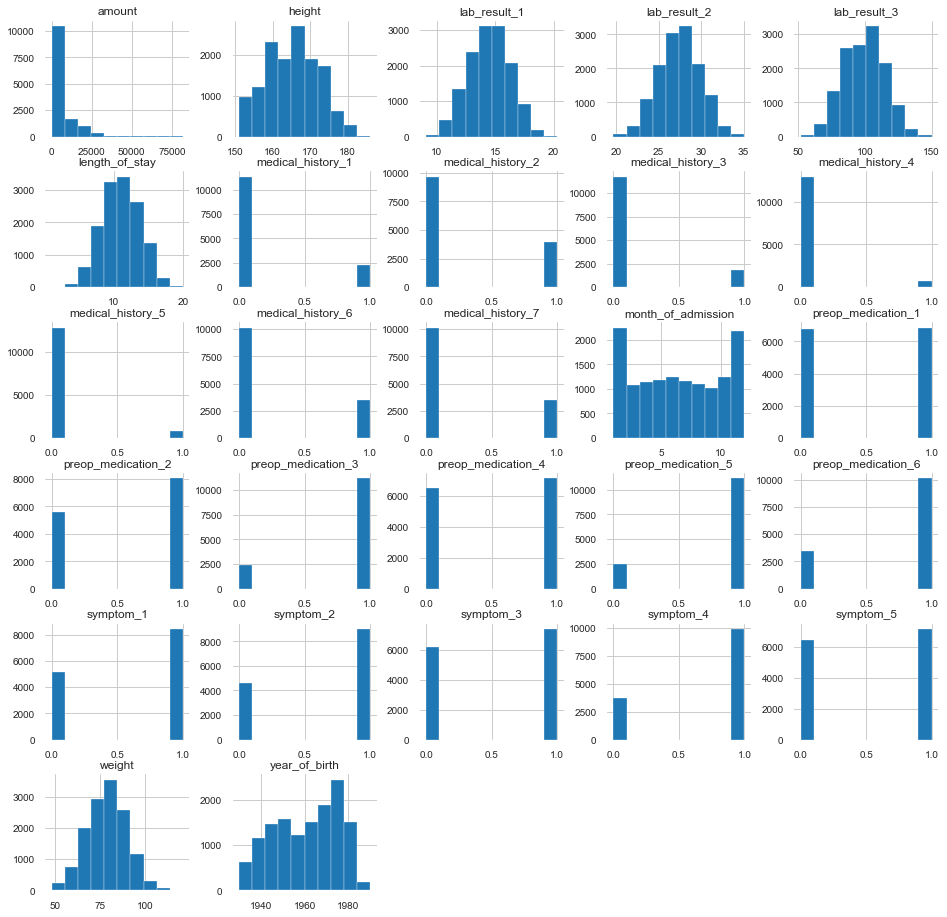

In [24]:
fig = plt.figure(figsize = (16,16))
ax = fig.gca()
treatment_df.hist(ax=ax);

In [25]:
treatment_df.skew()

bill_id              -0.006373
amount                2.275859
medical_history_1     1.765579
medical_history_2     0.925697
medical_history_3     2.121803
medical_history_4     4.033305
medical_history_5     3.773154
medical_history_6     1.126112
medical_history_7     1.127892
preop_medication_1   -0.015296
preop_medication_2   -0.370966
preop_medication_3   -1.673841
preop_medication_4   -0.093052
preop_medication_5   -1.663446
preop_medication_6   -1.119016
symptom_1            -0.493220
symptom_2            -0.686692
symptom_3            -0.179562
symptom_4            -1.016199
symptom_5            -0.107224
lab_result_1         -0.008328
lab_result_2          0.007508
lab_result_3          0.022036
weight                0.008528
height                0.032965
year_of_birth        -0.242439
month_of_admission    0.001604
length_of_stay        0.006284
dtype: float64

In [26]:
nums = treatment_df.select_dtypes(include='number')
cats = treatment_df.select_dtypes(exclude='number')
print(nums.shape)

(13600, 27)


In [27]:
z = np.abs(stats.zscore(nums))
no_nums = nums[(z < 3).all(axis=1)]
print(no_nums.shape)

(11840, 27)


In [28]:
no_nums.skew()

amount                1.721308
medical_history_1     1.761088
medical_history_2     0.953325
medical_history_3     2.101403
medical_history_4     0.000000
medical_history_5     0.000000
medical_history_6     1.128030
medical_history_7     1.121907
preop_medication_1   -0.032103
preop_medication_2   -0.382889
preop_medication_3   -1.669943
preop_medication_4   -0.093696
preop_medication_5   -1.636012
preop_medication_6   -1.100160
symptom_1            -0.461535
symptom_2            -0.684205
symptom_3            -0.172279
symptom_4            -1.016019
symptom_5            -0.081497
lab_result_1         -0.010410
lab_result_2         -0.004684
lab_result_3         -0.000234
weight               -0.049410
height                0.025006
year_of_birth        -0.247599
month_of_admission   -0.007866
length_of_stay        0.039906
dtype: float64

In [29]:
treatment_df = pd.concat([no_nums, cats], axis=1, join='inner') 

In [30]:
treatment_df.shape

(11840, 35)

### Check for Multicollinearity: Identify and Remove all Predictors with a Corrlelation of >=

In [31]:
corr_mtx = treatment_df.corr().abs()
upper = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(np.bool))
high_corr = [column for column in upper.columns if any(upper[column] > 0.70)]
high_corr

[]

## EDA & Hypothesis Testing

### Hypothesis 1: Demographics have an effect on treatment costs. Non-citzens incurr greater costs for medical treatment as opposed to residents.

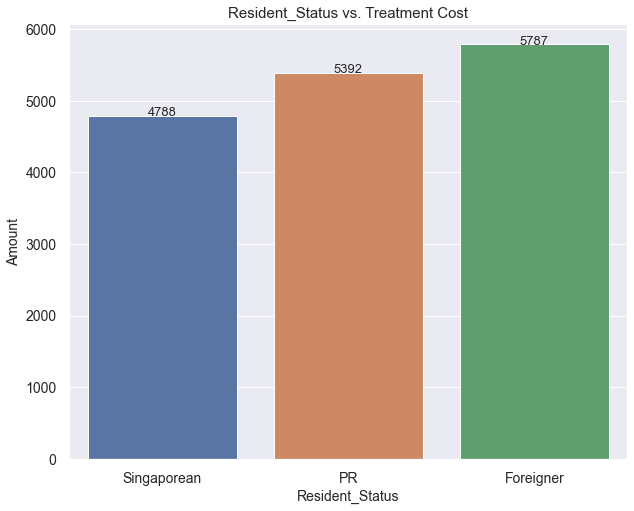

In [32]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(int(p.get_height()))
            ax.text(_x, _y, value, ha="center", size=13) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='resident_status', y='amount', data=treatment_df, ci=None)
ax.set_title('Resident_Status vs. Treatment Cost', fontsize = 15)
ax.set_xlabel('Resident_Status', fontsize=14)
ax.set_ylabel('Amount', fontsize=14)
ax.tick_params(labelsize=14)
show_values_on_bars(ax)

In [33]:
def show_boxplot_values(a,b):
    sns.set(rc={'figure.figsize':(10,8)})

    ax = sns.boxplot(x=a, y=b, data=treatment_df)

    medians = treatment_df.groupby([a])[b].median().astype(int)
    vertical_offset = treatment_df[b].median() * 0.3

    for xtick in ax.get_xticks():
        ax.text(xtick, medians[xtick] + vertical_offset, 
                                        medians[xtick], horizontalalignment='center', size=14, color='black', weight='bold')

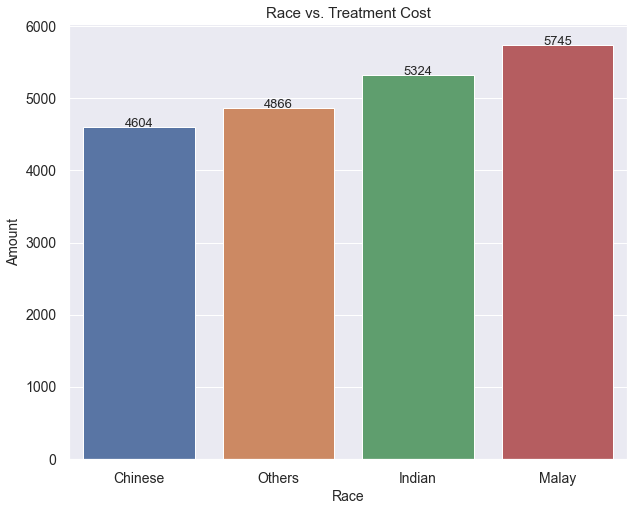

In [35]:
ax = sns.barplot(x='race', y='amount', data=treatment_df, ci=None)
ax.set_title('Race vs. Treatment Cost', fontsize = 15)
ax.set_xlabel('Race', fontsize=14)
ax.set_ylabel('Amount', fontsize=14)
ax.tick_params(labelsize=14)
show_values_on_bars(ax)

The first chart shows that Foreigners incur more medical costs than Singaporean and PR residents by ~>$400. However in the second chart, we see that Indian and Malaysian people incurr more medical treatment costs than people in the "Others" and "Chinese" category, therefore most non residents identify as Indian or Malaysia.

### Hypothesis 2: Older people incur greater medical costs, than younger people.

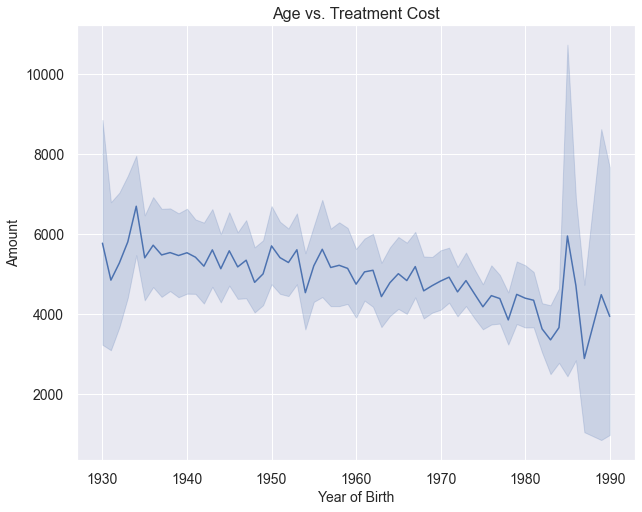

In [36]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.lineplot(data=treatment_df, x='year_of_birth', y='amount')
ax.axes.set_title('Age vs. Treatment Cost', fontsize=16)
ax.set_xlabel('Year of Birth', fontsize=14)
ax.set_ylabel('Amount', fontsize=14)
ax.tick_params(labelsize=14)

There is a decline in medical costs of patients born in the mid 1930's to early 1980's, which supports the aabove hypothesis, however there is a sharp increase in medical costs in the mid to late 1980's, we can assume that this spike in costs is due to increase in using advanced technology in the medical field, and introduction of new, contagious diseases/or airborne illnesses. 

### Hypothesis 3: Treatment costs are greater in the winter months do to flu virus, the common cold, etc.

In [38]:
# Convert month_of_admission to dtype object
treatment_df['month_of_admission'] = treatment_df.month_of_admission.astype('str')

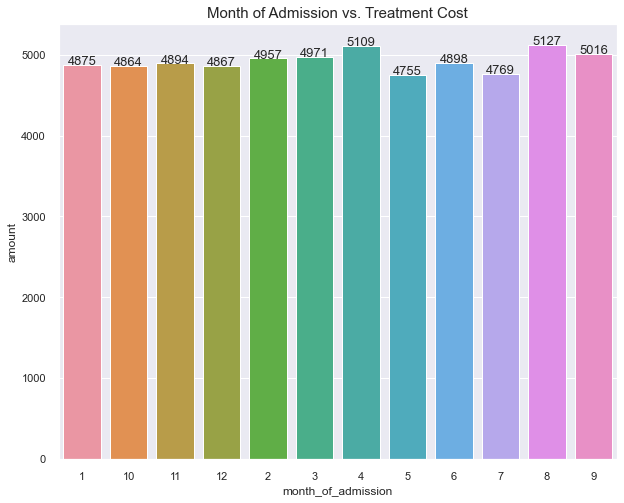

In [39]:
ax = sns.barplot(x='month_of_admission', y='amount', data=treatment_df, ci=None)
ax.set_title('Month of Admission vs. Treatment Cost', fontsize = 15)
show_values_on_bars(ax)

In [40]:
# Convert month_of_admission back to dtype int
treatment_df['month_of_admission'] = treatment_df.month_of_admission.astype('int64')

Treatment costs are actually more expensive in the months of August, April, & September. This could be due to allergy season, or heat related illnesses do to peak summer temperatures.

### Hypothesis 4: Patients with extensive medical history yields higher treament costs due to insurance preiums incurred for pre-existing conditions.

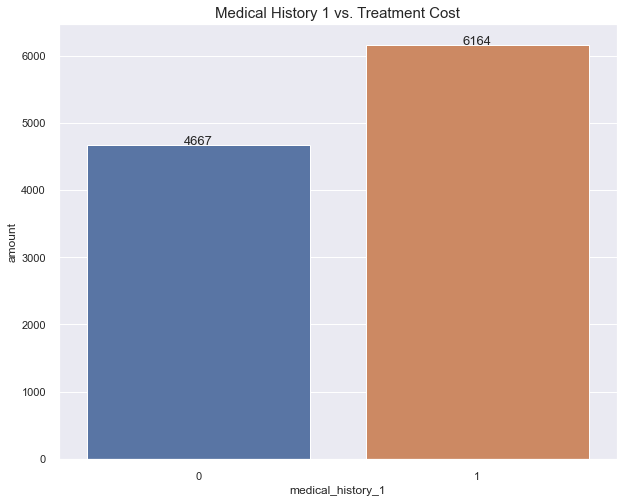

In [41]:
ax = sns.barplot(x='medical_history_1', y='amount', data=treatment_df, ci=None)
ax.set_title('Medical History 1 vs. Treatment Cost', fontsize = 15)
show_values_on_bars(ax)

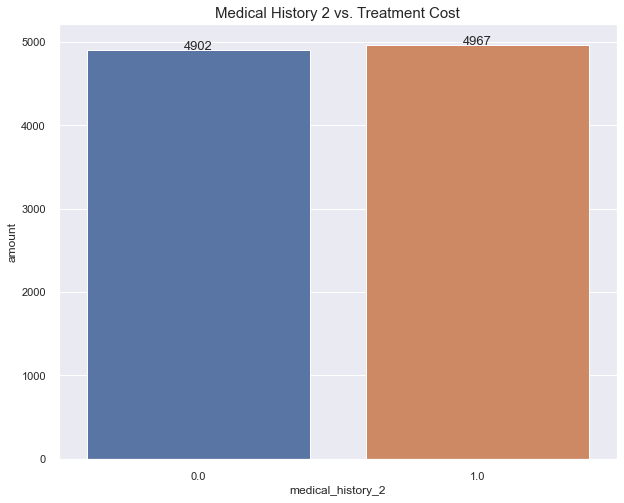

In [42]:
ax = sns.barplot(x='medical_history_2', y='amount', data=treatment_df, ci=None)
ax.set_title('Medical History 2 vs. Treatment Cost', fontsize = 15)
show_values_on_bars(ax)

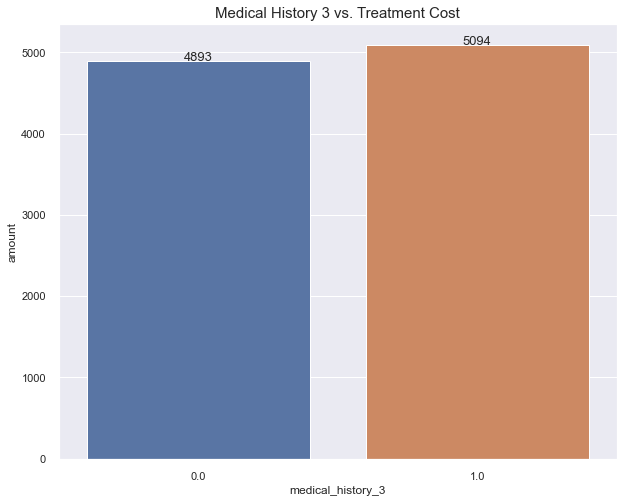

In [43]:
ax = sns.barplot(x='medical_history_3', y='amount', data=treatment_df, ci=None)
ax.set_title('Medical History 3 vs. Treatment Cost', fontsize = 15)
show_values_on_bars(ax)

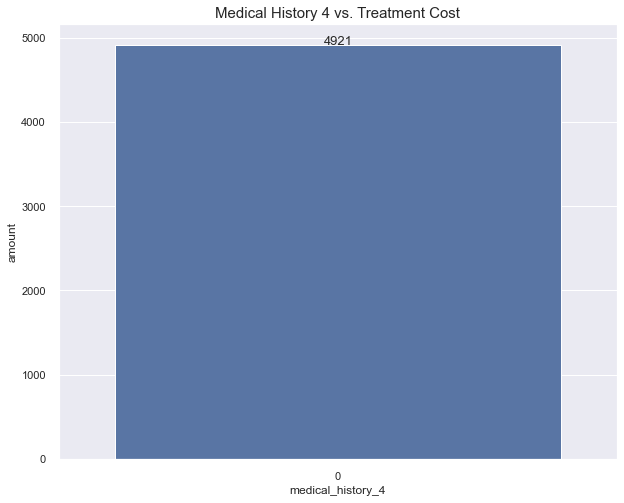

In [44]:
ax = sns.barplot(x='medical_history_4', y='amount', data=treatment_df, ci=None)
ax.set_title('Medical History 4 vs. Treatment Cost', fontsize = 15)
show_values_on_bars(ax)

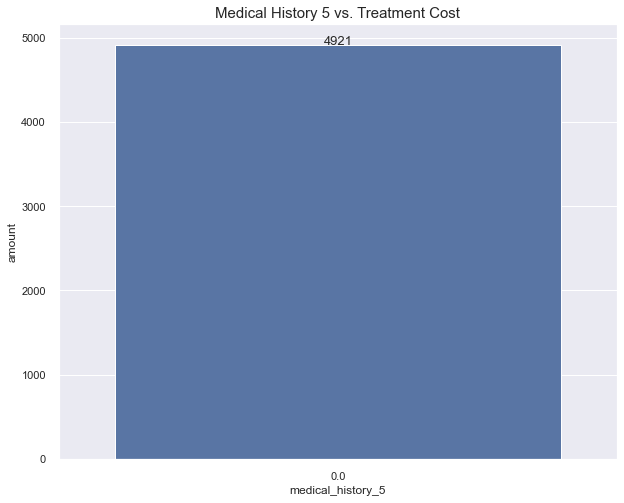

In [45]:
ax = sns.barplot(x='medical_history_5', y='amount', data=treatment_df, ci=None)
ax.set_title('Medical History 5 vs. Treatment Cost', fontsize = 15)
show_values_on_bars(ax)

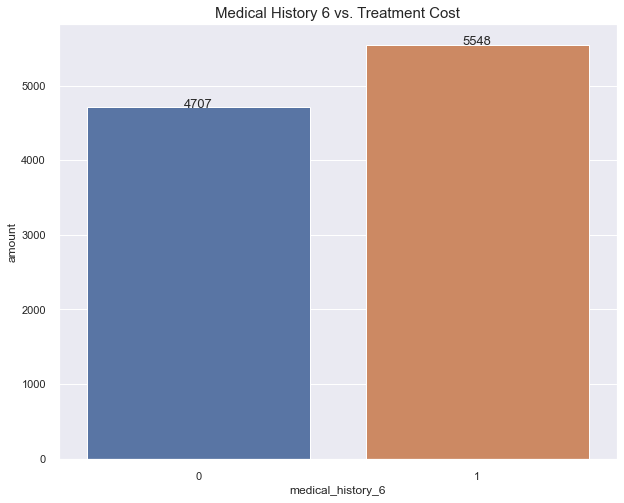

In [46]:
ax = sns.barplot(x='medical_history_6', y='amount', data=treatment_df, ci=None)
ax.set_title('Medical History 6 vs. Treatment Cost', fontsize = 15)
show_values_on_bars(ax)

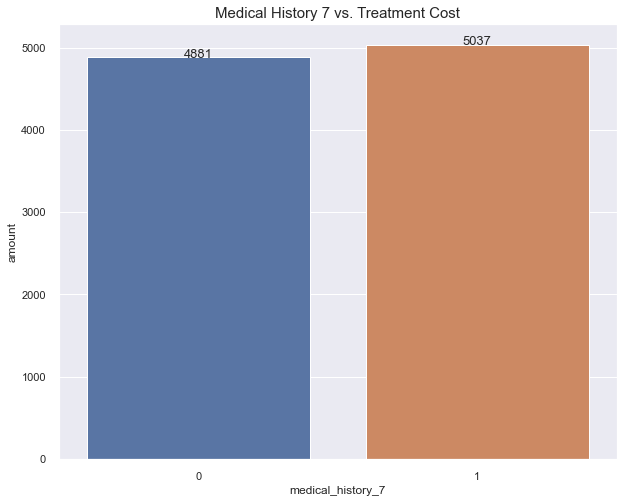

In [47]:
ax = sns.barplot(x='medical_history_7', y='amount', data=treatment_df, ci=None)
ax.set_title('Medical History 7 vs. Treatment Cost', fontsize = 15)
show_values_on_bars(ax)

Patients having Medical History 1 and Medical History 6 documented in their charts experience greater and more noticebale differences in treatment costs, than those without those conditions. It is safe to assume that certain medical histories are on a hierarchy with respect to billing.

## Modeling

### Feature Selection

In [51]:
# Drop non-useful features and datetime dtypes to create the dataset for modeling
treatment_df = treatment_df.drop(['bill_id', 'patient_id', 'date_of_admission', 'date_of_birth', 
                                   'date_of_discharge'], axis=1)


### Preprocessing: Feature Enginering

In [52]:
base_df = pd.get_dummies(treatment_df, drop_first=True)
base_df.head()

amount  medical_history_1  medical_history_2  medical_history_3  \
1    876.424366                  1                0.0                0.0   
3    836.612493                  1                1.0                0.0   
4    397.293041                  1                0.0                1.0   
6   1090.154069                  0                1.0                0.0   
7  14383.364621                  0                0.0                0.0   

   medical_history_4  medical_history_5  medical_history_6  medical_history_7  \
1                  0                0.0                  1                  0   
3                  0                0.0                  0                  0   
4                  0                0.0                  0                  0   
6                  0                0.0                  0                  0   
7                  0                0.0                  1                  0   

   preop_medication_1  preop_medication_2  ...  height  year_of_birth  \
1                   0                   1  ...   163.0           1946   
3                   0                   0  ...   151.0           1973   
4                   0                   1  ...   175.0           1968   
6                   0                   0  ...   157.0           1982   
7                   0                   1  ...   168.0           1979   

   month_of_admission  length_of_stay  gender_Male  race_Indian  race_Malay  \
1                  11              13            1            0           0   
3                   2              11            0            0           0   
4                  12              11            1            0           0   
6                   8              11            0            0           0   
7                   1              12            0            0           0   

   race_Others  resident_status_PR  resident_status_Singaporean  
1            0                   0                            1  
3            0                   0                            1  
4            0                   0                            1  
6            1                   1                            0  
7            0                   0                            1  

[5 rows x 33 columns]

In [53]:
# Separate the predictors, X, from the target variable, y
y_base = base_df.amount
X_base = base_df.drop('amount', axis=1)

In [54]:
# Print Ordinary Least Squares Summary
Xb = sm.add_constant(X_base)
model = sm.OLS(y_base, X_base)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 amount   R-squared (uncentered):                   0.390
Model:                            OLS   Adj. R-squared (uncentered):              0.388
Method:                 Least Squares   F-statistic:                              251.7
Date:                Sat, 10 Jul 2021   Prob (F-statistic):                        0.00
Time:                        12:52:27   Log-Likelihood:                     -1.2054e+05
No. Observations:               11840   AIC:                                  2.411e+05
Df Residuals:                   11810   BIC:                                  2.414e+05
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
medical_history_1            1558.9601    157.204      9.917      0.000    1250.815    1867.105
medical_history_2              34.4643    130.740      0.264      0.792    -221.809     290.737
medical_history_3             182.2485    171.302      1.064      0.287    -153.532     518.029
medical_history_4           -1.923e-11   7.36e-12     -2.612      0.009   -3.37e-11    -4.8e-12
medical_history_5            5.467e-11   2.28e-11      2.394      0.017    9.92e-12    9.94e-11
medical_history_6             817.5519    135.551      6.031      0.000     551.849    1083.255
medical_history_7             187.8217    135.692      1.384      0.166     -78.157     453.801
preop_medication_1            100.5930    118.140      0.851      0.395    -130.980     332.166
preop_medication_2             50.8343    120.391      0.422      0.673    -185.151     286.820
preop_medication_3            196.8294    153.985      1.278      0.201    -105.006     498.665
preop_medication_4             17.9225    118.489      0.151      0.880    -214.336     250.181
preop_medication_5             25.7794    152.703      0.169      0.866    -273.544     325.103
preop_medication_6            148.1816    134.765      1.100      0.272    -115.979     412.342
symptom_1                     403.7753    121.018      3.336      0.001     166.559     640.991
symptom_2                     651.5436    124.904      5.216      0.000     406.711     896.377
symptom_3                     599.0758    118.593      5.052      0.000     366.614     831.538
symptom_4                     578.3196    132.429      4.367      0.000     318.737     837.902
symptom_5                    1738.8803    118.233     14.707      0.000    1507.123    1970.637
lab_result_1                   -0.2866     33.710     -0.009      0.993     -66.364      65.790
lab_result_2                   24.3358     24.038      1.012      0.311     -22.782      71.454
lab_result_3                    1.4982      3.896      0.385      0.701      -6.139       9.136
weight                         22.5997      5.885      3.841      0.000      11.065      34.134
height                         21.1312     11.652      1.814      0.070      -1.708      43.971
year_of_birth                  -1.9950      1.096     -1.820      0.069      -4.144       0.154
month_of_admission              1.7666     17.270      0.102      0.919     -32.086      35.620
length_of_stay                 11.1853     20.872      0.536      0.592     -29.728      52.099
gender_Male                  -203.0298    173.134     -1.173      0.241    -542.402     136.342
race_Indian                   647.9283    200.478      3.232      0.001     254.958    1040.898
race_Mal

#### Check Q-Q Plot 

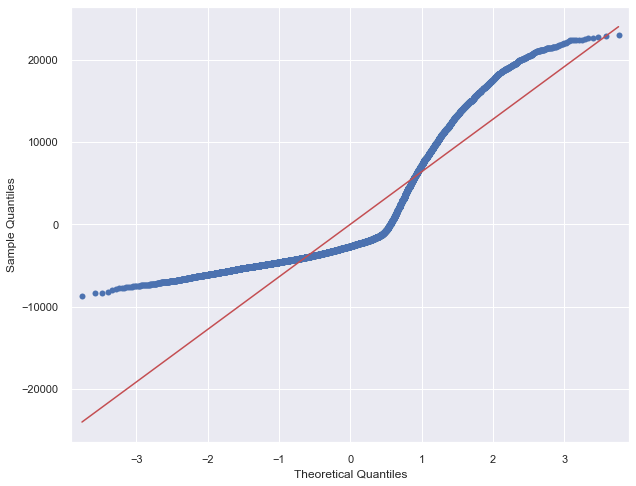

In [55]:
res = results.resid
fig = sm.qqplot(res, line='s')
plt.show()

### Create Final Dataset

In [79]:
# Drop features with P values > 0.05
feats_to_keep = ['medical_history_1','medical_history_4', 'medical_history_5',
                 'medical_history_6', 'symptom_1', 'symptom_2', 'symptom_3',
                 'symptom_4', 'symptom_5', 'race_Indian', 'race_Malay', 
                 'resident_status_Singaporean', 'weight', 'amount']


model_dataset = base_df[feats_to_keep]
model_dataset.head()

medical_history_1  medical_history_4  medical_history_5  medical_history_6  \
1                  1                  0                0.0                  1   
3                  1                  0                0.0                  0   
4                  1                  0                0.0                  0   
6                  0                  0                0.0                  0   
7                  0                  0                0.0                  1   

   symptom_1  symptom_2  symptom_3  symptom_4  symptom_5  race_Indian  \
1          0          0          0          1          1            0   
3          1          0          0          1          1            0   
4          1          1          1          1          0            0   
6          1          0          1          1          0            0   
7          1          1          0          1          1            0   

   race_Malay  resident_status_Singaporean  weight        amount  
1           0                            1    89.9    876.424366  
3           0                            1    80.2    836.612493  
4           0                            1    87.0    397.293041  
6           0                            0    80.0   1090.154069  
7           0                            1    76.8  14383.364621

In [80]:
# Copy dataset
model_dataset_copy = model_dataset.copy()

### Build Regression Pipleline

In [81]:
# Partition
y = model_dataset.amount
X = model_dataset.drop(['amount'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# Define continuous features 
continuous = list(X_train.select_dtypes(include = ['number']))

# Define object features
objects = list(X_train.select_dtypes(exclude = ['number']))

In [83]:
# Define Object Pipeline
obj_pipe = Pipeline([('imputer', SimpleImputer(strategy='constant')), 
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Define Continuous Pipeline
contin_pipe_maxab = Pipeline([('imputer', SimpleImputer(strategy='median')), 
                        ('scaler', MaxAbsScaler())])

# Combine Object & Continuous Feature Pipeline
preprocess_maxab = ColumnTransformer([('obj', obj_pipe, objects), 
                                ('cont', contin_pipe_maxab, continuous)])

### Baseline Model: Linear Regression

In [84]:
# Fit pipline with transformers and estimator to training data
pipe1 = Pipeline([('preprocessor', preprocess_maxab), ('model', LinearRegression())])
model1 = pipe1.fit(X_train, y_train)

In [85]:
# Predict training data
y_train_pred1 = pipe1.predict(X_train)

# Predict test and test
y_test_pred1 = pipe1.predict(X_test)

In [86]:
# Print R^2
print('Train R^2: ', r2_score(y_train, y_train_pred1))
print('Test R^2: ', r2_score(y_test, y_test_pred1))

# Print RMSE
print('Train Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred1)))
print('Test Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred1)))

Train R^2:  0.04571128647528566
Test R^2:  0.02563547184972581
Train Root Mean Square Error 6445.500083815181
Test Root Mean Square Error 6174.7093675423


### Linear Regression. Scaler: Yeo-Johnson

In [87]:
# Define Continuous Pipeline
contin_pipe_yeo = Pipeline([('imputer', SimpleImputer(strategy='median')), 
                        ('power', PowerTransformer(method='yeo-johnson', standardize=True))])

# Combine Object & Continuous Feature Pipeline
preprocess_yeo = ColumnTransformer([('obj', obj_pipe, objects), 
                                ('cont', contin_pipe_yeo, continuous)])

In [88]:
pipe1a = Pipeline([('preprocessor', preprocess_yeo), ('model', LinearRegression())])
pipe1a.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('obj',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  []),
                                                 ('cont',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('power',
                                                                   PowerTran

In [89]:
model1a = pipe1a.fit(X_train, y_train)
                
# Predict training data
y_train_pred1a = pipe1a.predict(X_train)

# Predict test and test
y_test_pred1a = pipe1a.predict(X_test)
                 
print('Train R^2: ', r2_score(y_train, y_train_pred1a))
print('Test R^2: ', r2_score(y_test, y_test_pred1a))

# Print RMSE
print('Train Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred1a)))
print('Test Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred1a)))

Train R^2:  0.04570884599147018
Test R^2:  0.02563705328619459
Train Root Mean Square Error 6445.508325623115
Test Root Mean Square Error 6174.704356627875


### Linear Regression: Standard Scaler

In [90]:
# Define Continuous Pipeline
std_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), 
                        ('scaler', StandardScaler())])

# Combine Object & Continuous Feature Pipeline
preprocess_std = ColumnTransformer([('obj', obj_pipe, objects), 
                                ('cont', std_pipe, continuous)])

In [91]:
pipe1b = Pipeline([('preprocessor', preprocess_std), ('model', LinearRegression())])
pipe1b.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('obj',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  []),
                                                 ('cont',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   Standard

In [92]:
model1b = pipe1b.fit(X_train, y_train)
                
# Predict training data
y_train_pred1b = pipe1b.predict(X_train)

# Predict test and test
y_test_pred1b = pipe1b.predict(X_test)
                 
print('Train R^2: ', r2_score(y_train, y_train_pred1b))
print('Test R^2: ', r2_score(y_test, y_test_pred1b))

# Print RMSE
print('Train Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred1b)))
print('Test Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred1b)))

Train R^2:  0.04571128647528566
Test R^2:  0.025635471849726033
Train Root Mean Square Error 6445.500083815181
Test Root Mean Square Error 6174.7093675423


### Try Polynomial Regression: Degree = 2

In [94]:
# Yeo
poly_feats2 = PolynomialFeatures(degree=2, include_bias=False)
pipe2 = Pipeline([('preprocessor', preprocess_yeo),
                 ('poly', poly_feats2), ('model', LinearRegression())])


In [95]:
model2 = pipe2.fit(X_train, y_train)
                
# Predict training data
y_train_pred2 = pipe2.predict(X_train)

# Predict test and test
y_test_pred2 = pipe2.predict(X_test)
                 
print('Train R^2: ', r2_score(y_train, y_train_pred2))
print('Test R^2: ', r2_score(y_test, y_test_pred2))

# Print RMSE
print('Train Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred2)))
print('Test Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2)))

Train R^2:  0.05343203356088699
Test R^2:  0.01918842895080175
Train Root Mean Square Error 6419.373221178027
Test Root Mean Square Error 6195.103676822026


### Poly Regression: Degree 2, Create Interaction Terms

In [96]:
poly_feats2a = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
pipe2a = Pipeline([('preprocessor', preprocess_yeo),
                 ('interact_poly', poly_feats2a), ('model', LinearRegression())])



In [97]:
model2a = pipe2a.fit(X_train, y_train)
                
# Predict training data
y_train_pred2a = pipe2a.predict(X_train)

# Predict test and test
y_test_pred2a = pipe2a.predict(X_test)
                 
print('Train R^2: ', r2_score(y_train, y_train_pred2a))
print('Test R^2: ', r2_score(y_test, y_test_pred2a))

# Print RMSE
print('Train Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred2a)))
print('Test Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2a)))

Train R^2:  0.052621993853826154
Test R^2:  0.020649410054270012
Train Root Mean Square Error 6422.11937115379
Test Root Mean Square Error 6190.487957213271


### Poly Regression: Degree = 4

In [98]:
poly_feats3 = PolynomialFeatures(degree=4, interaction_only=True, include_bias=False)
pipe3 = Pipeline([('preprocessor', preprocess_yeo),
                  ('inter_poly', poly_feats3), ('model', LinearRegression())
                ])

In [99]:
model3 = pipe3.fit(X_train, y_train)
                
# Predict training data
y_train_pred3 = pipe3.predict(X_train)

# Predict test and test
y_test_pred3 = pipe3.predict(X_test)
                 
print('Train R^2: ', r2_score(y_train, y_train_pred3))
print('Test R^2: ', r2_score(y_test, y_test_pred3))

# Print RMSE
print('Train Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred3)))
print('Test Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred3)))

Train R^2:  0.055906857983570424
Test R^2:  -0.10709794605074996
Train Root Mean Square Error 6410.975927003281
Test Root Mean Square Error 6581.8625854200445


#### Try Regularization Methods

In [100]:
# Ridge Regression
poly_featsreg = PolynomialFeatures(degree=4, interaction_only=True, include_bias=False)
pipe_reg = Pipeline([('preprocessor', preprocess_yeo),
                     ('inter_poly', poly_featsreg), 
                     ('model', Ridge(alpha=100, fit_intercept=True))
                ])

In [101]:
model_reg = pipe_reg.fit(X_train, y_train)
                
# Predict training data
y_train_predr = pipe_reg.predict(X_train)

# Predict test and test
y_test_predr = pipe_reg.predict(X_test)
                 
print('Train R^2: ', r2_score(y_train, y_train_predr))
print('Test R^2: ', r2_score(y_test, y_test_predr))

# Print RMSE
print('Train Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_train, y_train_predr)))
print('Test Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_test, y_test_predr)))

Train R^2:  0.07356904018430233
Test R^2:  -0.07258879511262695
Train Root Mean Square Error 6350.724231381201
Test Root Mean Square Error 6478.46946749671


In [102]:
# Lasso
poly_feats_lasso = PolynomialFeatures(degree=4, interaction_only=True, include_bias=False)
pipe_lasso = Pipeline([('preprocessor', preprocess_yeo),
                     ('inter_poly', poly_feats_lasso), 
                     ('model', LassoCV(cv=5, random_state=0))
                ])



In [103]:
model_lasso = pipe_lasso.fit(X_train, y_train)
                
# Predict training data
y_train_predl = pipe_lasso.predict(X_train)

# Predict test and test
y_test_predl = pipe_reg.predict(X_test)
                 
print('Train R^2: ', r2_score(y_train, y_train_predl))
print('Test R^2: ', r2_score(y_test, y_test_predl))

# Print RMSE
print('Train Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_train, y_train_predl)))
print('Test Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_test, y_test_predl)))

Train R^2:  0.04575426941162197
Test R^2:  -0.07258879511262695
Train Root Mean Square Error 6445.354923532148
Test Root Mean Square Error 6478.46946749671


### Polynomial Regression: Degree = 8

In [104]:
# Ridge
poly_feats4 = PolynomialFeatures(degree=8, interaction_only=True, include_bias=False)
pipe4 = Pipeline([('preprocessor', preprocess_yeo),
                  ('inter_poly', poly_feats4), 
                  ('model', Ridge(alpha=100, fit_intercept=True))])

In [105]:
model4 = pipe4.fit(X_train, y_train)
                
# Predict training data
y_train_pred4 = pipe4.predict(X_train)

# Predict test and test
y_test_pred4 = pipe4.predict(X_test)
                 
print('Train R^2: ', r2_score(y_train, y_train_pred4))
print('Test R^2: ', r2_score(y_test, y_test_pred4))

# Print RMSE
print('Train Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred4)))
print('Test Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred4)))

Train R^2:  0.08548234819583289
Test R^2:  -0.17261615696460586
Train Root Mean Square Error 6309.758988155516
Test Root Mean Square Error 6773.821144145884


In [106]:
# Lasso
poly_feats5 = PolynomialFeatures(degree=8, interaction_only=True, include_bias=False)
pipe5 = Pipeline([('preprocessor', preprocess_yeo),
                  ('inter_poly', poly_feats5), 
                  ('model', LassoCV(cv=5, random_state=0))])

In [107]:
model5 = pipe5.fit(X_train, y_train)
                
# Predict training data
y_train_pred5 = pipe5.predict(X_train)

# Predict test and test
y_test_pred5 = pipe5.predict(X_test)
                 
print('Train R^2: ', r2_score(y_train, y_train_pred5))
print('Test R^2: ', r2_score(y_test, y_test_pred5))

# Print RMSE
print('Train Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred5)))
print('Test Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred5)))

Train R^2:  0.04353524641724682
Test R^2:  0.027578432090477167
Train Root Mean Square Error 6452.8446534874165
Test Root Mean Square Error 6168.549864977872


### Feature Importance

In [115]:
feature_names = model5.named_steps["inter_poly"].get_feature_names()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df.head(20),
           palette=df.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

In [116]:
coefs

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x8 x9',
 'x8 x10',
 'x8 x11',
 'x8 x12',
 'x9 x10',
 'x9 x11',
 'x9 x12',
 'x10 x11',
 'x10 x12',
 'x11 x12',
 'x0 x1 x2',
 'x0 x1 x3',
 'x0 x1 x4',
 'x0 x1 x5',
 'x0 x1 x6',
 'x0 x1 x7',
 'x0 x1 x8',

In [ ]:
model5.best_estimator_.named_steps[a]

In [112]:
pipe5.best_estimator_

AttributeError: 'Pipeline' object has no attribute 'best_estimator_'

In [110]:
# Get model coefficients
importance = model5.coef_
for index, v, in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


AttributeError: 'Pipeline' object has no attribute 'coef_'